In [606]:
from pathlib import Path
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
import plotly.colors
import numpy as np
import scipy
import sklearn.decomposition
import copy
import paretoset
import matplotlib.pyplot as plt


In [607]:
pio.templates["matplotlib"] = copy.deepcopy(pio.templates["plotly_white"])
pio.templates.default = "matplotlib"
pio.templates["matplotlib"]["layout"]["xaxis"]["showline"] = True
pio.templates["matplotlib"]["layout"]["xaxis"]["linecolor"] = "black"
pio.templates["matplotlib"]["layout"]["yaxis"]["showline"] = True
pio.templates["matplotlib"]["layout"]["yaxis"]["linecolor"] = "black"
pio.templates["matplotlib"]["layout"]["colorway"] = plotly.colors.qualitative.T10

In [608]:
csv_files = {x.stem: x for x in (Path("../data").glob("*.csv"))}

In [609]:
# all_results_df = pd.read_csv(csv_files["all_results"])
# all_results_df = pd.read_csv(csv_files["full_data_pepr"])
all_results_df = pd.read_csv(csv_files["full_data_pepr_dataset_small_full"])

all_results_df.columns

Index(['model', 'num_param', 'memT', 'memR', 'memA', 'memM', 'energy', 'co2',
       'train_time', 'infer_time', 'test_00', 'inf_time', 'tr_acc', 'test_01',
       'test_02', 'test_03', 'test_04', 'test_05', 'test_06', 'test_07',
       'test_08', 'test_09', 'pretrain', 'type', 'efficient', 'dataset', 'pen',
       'conv_idx', 'best_test', 'energy_conv', 'time_conv', 'co2_conv', 'E_n',
       'pepr_e', 'C_n', 'pepr_c', 'T_n', 'pepr_t', 'pepr_m', 'cnn', 'pepr_t`'],
      dtype='object')

In [638]:
all_results_df.sort_values("E_n", ascending=False)

model  num_param       memT       memR      memA  \
384             nasnetalarge   88753150  25.435111  21.336424  1.389253   
383  swinv2_base_window8_256   87918816  25.435111  13.969129  1.425506   
212        convnext_tiny_hnf   28589128  25.435111   5.511315  0.499510   
576         convmixer_768_32   21110248  25.435111  17.379099  0.343710   
373                    dpn98   61570728  25.435111  12.178162  0.958104   
..                       ...        ...        ...        ...       ...   
143               fbnetc_100    5572200  25.435111   3.070231  0.097456   
146         ese_vovnet19b_dw    6543080  25.435111   3.839885  0.130361   
131                 dla46x_c    1068440  25.435111   3.001025  0.035175   
137            convnext_atto    3695520  25.435111   1.593836  0.093865   
396          mobilenetv2_050    1968680  25.435111   2.353005  0.030681   

          memM    energy       co2  train_time  infer_time  ...  co2_conv  \
384  20.229133  0.227686  7.855172  138.659011           0  ...  7.855172   
383  13.448308  0.201539  6.751540  123.093376           0  ...  6.751540   
212   5.052087  0.129989  8.904260   10.095119           0  ...  8.904260   
576  17.018504  0.163470  6.988357  100.250563           0  ...  3.494178   
373  10.168339  0.158044  5.926657   96.535804           0  ...  5.926657   
..         ...       ...       ...         ...         ...  ...       ...   
143   2.377076  0.002377  0.356519    1.942521           0  ...  0.039613   
146   3.329200  0.002563  0.384440    2.158326           0  ...  0.038444   
131   2.267537  0.002209  0.331298    1.933118           0  ...  0.033130   
137   1.502296  0.001902  0.285371    1.784745           0  ...  0.028537   
396   1.919404  0.001503  0.221705    1.402890           0  ...  0.022170   

              E_n    pepr_e           C_n    pepr_c           T_n    pepr_t  \
384  6.816027e-01  0.424256  2.427928e-01  0.574055  6.782954e-01  0.356715   
383  6.032753e-01  0.326376  2.085845e-01  0.432962  6.020739e-01  0.277201   
212  5.108518e-01  0.443031  4.262686e-01  0.469305  6.355858e-02  0.624148   
576  4.998500e-01  0.622869  3.542934e-01  0.689814  4.997195e-01  0.686293   
373  4.729844e-01  0.466288  1.830163e-01  0.580580  4.720274e-01  0.404953   
..            ...       ...           ...       ...           ...       ...   
143  2.906153e-04  0.742728  5.319436e-04  0.742549  4.893452e-04  0.742089   
146  2.599379e-04  0.778024  4.757916e-04  0.777856  4.893255e-04  0.777331   
131  1.205040e-04  0.738822  2.205711e-04  0.738748  3.455529e-04  0.738181   
137  0.000000e+00  0.683972 -1.666249e-19  0.683972  2.508318e-04  0.683369   
396 -8.314416e-20  0.534242 -1.075395e-19  0.534242 -1.359129e-19  0.533918   

       pepr_m    cnn   pepr_t`  
384  0.369961  False  0.425093  
383  0.330684  False  0.326621  
212  0.564777   True  0.629354  
576  0.536120   True  0.622924  
373  0.458417   True  0.466591  
..        ...    ...       ...  
143  0.694002   True  0.742580  
146  0.703215   True  0.777845  
131  0.692337   True  0.738656  
137  0.683164   True  0.683800  
396  0.515262   True  0.534242  

[786 rows x 41 columns]

/Users/bob/venv/python3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



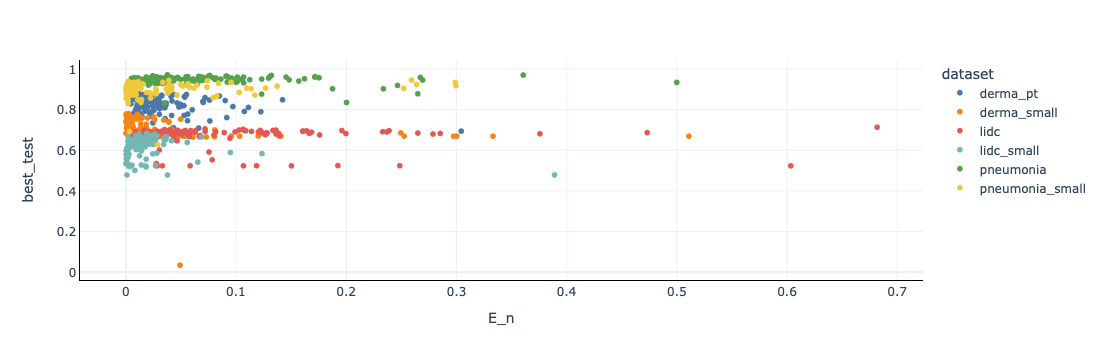

In [640]:
px.scatter(all_results_df, x="E_n", y="best_test", hover_name="model", color="dataset")

In [641]:
all_results_df["dataset"].unique().tolist()

['derma_pt',
 'derma_small',
 'lidc',
 'lidc_small',
 'pneumonia',
 'pneumonia_small']

In [642]:
model_columns = ["model", "num_param", "type", "efficient"]
model_df = all_results_df[model_columns].drop_duplicates().reset_index(drop=True)
model_df

model  num_param   type  efficient
0           dla46x_c    1068440    CNN          0
1            dla46_c    1301400    CNN          0
2    mobilevitv2_050    1370593  Other          1
3    mobilenetv2_050    1968680    CNN          1
4      semnasnet_075    2912278  Other          1
..               ...        ...    ...        ...
126    ecaresnet269d  102093077  Other          1
127  legacy_senet154  115088984    CNN          0
128      resnetrs270  129861448    CNN          0
129            vgg11  132863336    CNN          0
130            vgg13  133047848    CNN          0

[131 rows x 4 columns]

In [643]:
dataset_columns = ["dataset"]
dataset_info_df = all_results_df[dataset_columns].drop_duplicates()
dataset_info_df = dataset_info_df.reset_index(drop=True)
dataset_info_df["small"] = [x.endswith("small") for x in dataset_info_df["dataset"]]
dataset_info_df["pretrain"] = [x != "derma" for x in dataset_info_df["dataset"]]
dataset_info_df

dataset  small  pretrain
0         derma_pt  False      True
1      derma_small   True      True
2             lidc  False      True
3       lidc_small   True      True
4        pneumonia  False      True
5  pneumonia_small   True      True

In [644]:
# dataset_prefix = "derma"
# idx = (all_results_df["dataset"] == "derma_small") | (all_results_df["dataset"] == "derma_pt")
# idx = (all_results_df["dataset"] == "derma_small")
# dataset_prefix = "derma_pt"
# dataset_prefix = "lidc"
# dataset_prefix = "pneumonia"
# idx = (all_results_df["dataset"] == f"{dataset_prefix}_small") | (all_results_df["dataset"] == f"{dataset_prefix}")
# idx = (all_results_df["dataset"] == f"{dataset_prefix}")
# dataset_prefix = "all_large"
# idx = (all_results_df["dataset"] == f"derma_pt") | (all_results_df["dataset"] == f"lidc") | (all_results_df["dataset"] == f"pneumonia")
# idx = (all_results_df["dataset"] == "derma_small") | (all_results_df["dataset"] == "derma")
# idx = (all_results_df["dataset"] == "pneumonia_small") | (all_results_df["dataset"] == "pneumonia")
# df = pd.DataFrame(all_results_df[idx])
df = pd.DataFrame(all_results_df)
df = df.sort_values(["dataset", "num_param"])
df["label"] = [f"{x.model} {x.dataset}" for x in df.itertuples()]
df["dataset"].unique()

array(['derma_pt', 'derma_small', 'lidc', 'lidc_small', 'pneumonia',
       'pneumonia_small'], dtype=object)

In [645]:
df["test_profile"] = df[[f"test_{i:02d}" for i in range(10)]].values.tolist()

In [646]:
test_profile = np.array(df["test_profile"].tolist())

In [647]:
peak_profile = np.zeros_like(test_profile)
peak_profile[:, 0] = test_profile[:, 0]
for i in range(1, peak_profile.shape[-1]):
    peak_profile[:, i] = np.maximum(peak_profile[:, i-1], test_profile[:, i])
peak_profile

array([[0.62953629, 0.66733871, 0.68850806, ..., 0.77772177, 0.78427419,
        0.78427419],
       [0.60904255, 0.60904255, 0.61003989, ..., 0.64893617, 0.64893617,
        0.64893617],
       [0.62599734, 0.67952128, 0.67952128, ..., 0.67952128, 0.67952128,
        0.67952128],
       ...,
       [0.62664474, 0.75657895, 0.8125    , ..., 0.875     , 0.875     ,
        0.89802632],
       [0.62664474, 0.62664474, 0.77467105, ..., 0.83059211, 0.83059211,
        0.83059211],
       [0.8125    , 0.84868421, 0.85197368, ..., 0.88980263, 0.88980263,
        0.88980263]])

In [648]:
df["peak_profile"] = peak_profile.tolist()

In [649]:
df["peak_test"] = peak_profile[:, -1]

In [650]:
df[["peak_test", "best_test"]]

peak_test  best_test
0     0.784274   0.784274
1     0.648936   0.648936
2     0.679521   0.679521
3     0.828629   0.828629
4     0.654920   0.654920
..         ...        ...
781   0.835526   0.835526
782   0.856908   0.856908
783   0.898026   0.898026
784   0.830592   0.830592
785   0.889803   0.889803

[786 rows x 2 columns]

In [651]:
dataset_max_test = df.groupby("dataset")[["peak_test"]].max().rename(columns={"peak_test": "dataset_peak_test"}).reset_index()
dataset_max_test

dataset  dataset_peak_test
0         derma_pt           0.878528
1      derma_small           0.780242
2             lidc           0.713431
3       lidc_small           0.682846
4        pneumonia           0.972039
5  pneumonia_small           0.945724

In [652]:
df["dataset_peak_test"] = pd.merge(df[["dataset"]], dataset_max_test, on="dataset", how="left")["dataset_peak_test"].values
df

model  num_param       memT       memR      memA       memM  \
0           dla46x_c    1068440  25.435111   3.001025  0.038321   2.267537   
1            dla46_c    1301400  25.435111   2.533360  0.017119   1.865552   
2    mobilevitv2_050    1370593  25.435111   3.097494  0.035256   2.869059   
3    mobilenetv2_050    1968680  25.435111   2.227175  0.053616   1.934997   
4      semnasnet_075    2912278  25.435111   2.797601  0.043698   2.101022   
..               ...        ...        ...        ...       ...        ...   
781    ecaresnet269d  102093077  25.435111  19.709034  1.665001  19.053249   
782  legacy_senet154  115088984  25.435111  17.882415  1.865626  16.580966   
783      resnetrs270  129861448  25.435111  20.937966  2.095463  20.111435   
784            vgg11  132863336  25.435111   6.322913  2.087315   4.486133   
785            vgg13  133047848  25.435111   7.398752  2.089220   5.292606   

       energy       co2  train_time  infer_time  ...       T_n    pepr_t  \
0    0.018471  0.969729   11.868347           0  ...  0.007530  0.777195   
1    0.019036  1.132670   11.866928           0  ...  0.014263  0.638266   
2    0.018340  1.091230   11.394145           0  ...  0.035482  0.652948   
3    0.010746  0.591005    7.331524           0  ...  0.004962  0.823518   
4    0.017971  1.051323   11.187723           0  ...  0.006254  0.649938   
..        ...       ...         ...         ...  ...       ...       ...   
781  0.013694  6.504469    9.173475           0  ...  0.014698  0.826742   
782  0.014815  7.037225    9.713932           0  ...  0.023677  0.842488   
783  0.014513  6.893659    9.514268           0  ...  0.008935  0.892263   
784  0.003151  1.496582    2.517016           0  ...  0.002579  0.829046   
785  0.004821  2.290159    3.474425           0  ...  0.008108  0.884618   

       pepr_m    cnn   pepr_t`                            label  \
0    0.734841   True  0.778413                dla46x_c derma_pt   
1    0.620809   True  0.639810                 dla46_c derma_pt   
2    0.633999  False  0.656237         mobilevitv2_050 derma_pt   
3    0.803771   True  0.824538         mobilenetv2_050 derma_pt   
4    0.619183  False  0.650850           semnasnet_075 derma_pt   
..        ...    ...       ...                              ...   
781  0.451157  False  0.823423    ecaresnet269d pneumonia_small   
782  0.485177   True  0.837088  legacy_senet154 pneumonia_small   
783  0.470249   True  0.890074      resnetrs270 pneumonia_small   
784  0.678986   True  0.828455            vgg11 pneumonia_small   
785  0.698536   True  0.882646            vgg13 pneumonia_small   

                                          test_profile  \
0    [0.629536290322581, 0.667338709677419, 0.68850...   
1    [0.609042553191489, 0.587765957446808, 0.61003...   
2    [0.625997340425532, 0.679521276595745, 0.66289...   
3    [0.729334677419355, 0.772177419354839, 0.80040...   
4    [0.638962765957447, 0.644946808510638, 0.64162...   
..                                                 ...   
781  [0.666118421052632, 0.69078947368421, 0.741776...   
782  [0.626644736842105, 0.786184210526316, 0.81743...   
783  [0.626644736842105, 0.756578947368421, 0.8125,...   
784  [0.626644736842105, 0.626644736842105, 0.77467...   
785  [0.8125, 0.848684210526316, 0.851973684210526,...   

                                          peak_profile  peak_test  \
0    [0.629536290322581, 0.667338709677419, 0.68850...   0.784274   
1    [0.609042553191489, 0.609042553191489, 0.61003...   0.648936   
2    [0.625997340425532, 0.679521276595745, 0.67952...   0.679521   
3    [0.729334677419355, 0.772177419354839, 0.80040...   0.828629   
4    [0.638962765957447, 0.644946808510638, 0.64494...   0.654920   
..                                                 ...        ...   
781  [0.666118421052632, 0.69078947368421, 0.741776...   0.835526   
782  [0.626644736842105, 0.786184210526316, 0.81743...   0.856908   
783  [0.626644736842105, 0.756578947368421

/Users/bob/venv/python3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



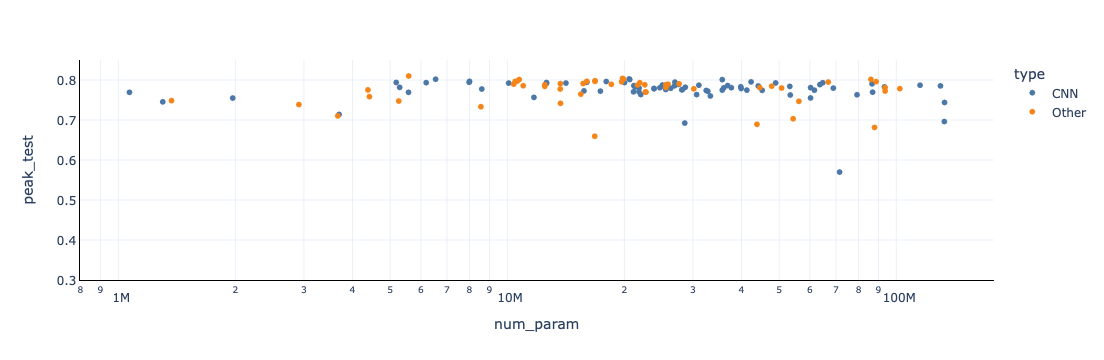

In [653]:
# grouped_df = df.groupby("model")[["peak_test", "num_param"]].mean()
df["relative_peak_test"] = df["peak_test"] / df["dataset_peak_test"]
grouped_df = df.groupby("model").agg({"peak_test": "mean", "relative_peak_test": "mean", "num_param": "mean", "label": "max", "energy": "max", "type": "max"})
px.scatter(grouped_df, x="num_param", y="peak_test", hover_name="label", range_y=[0.3, 0.85], color="type", log_x=True)


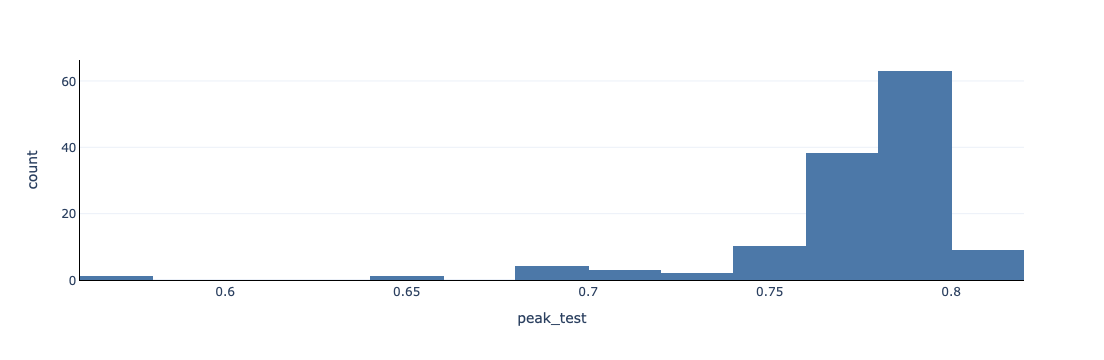

In [654]:
px.histogram(grouped_df, x="peak_test", nbins=16)

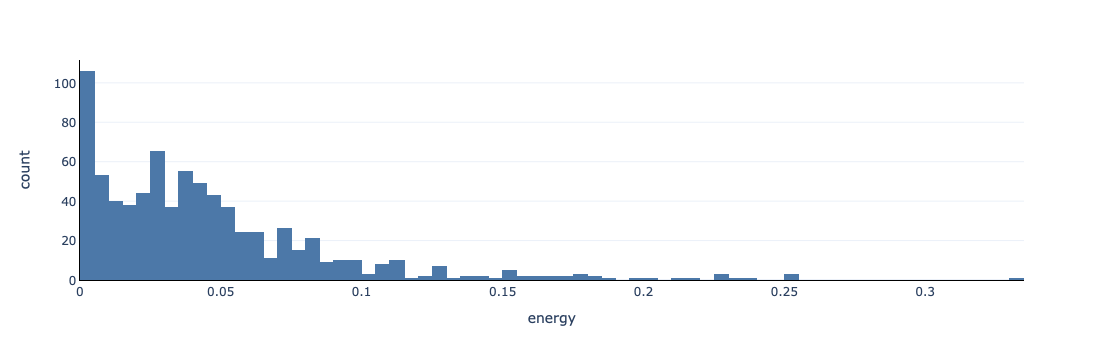

In [655]:
px.histogram(df, x="energy", nbins=2**7)

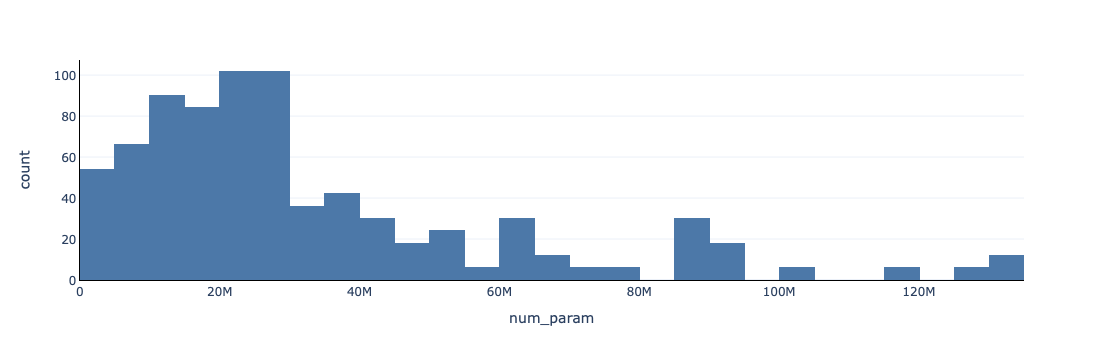

In [656]:
px.histogram(df, x="num_param", nbins=2**6)

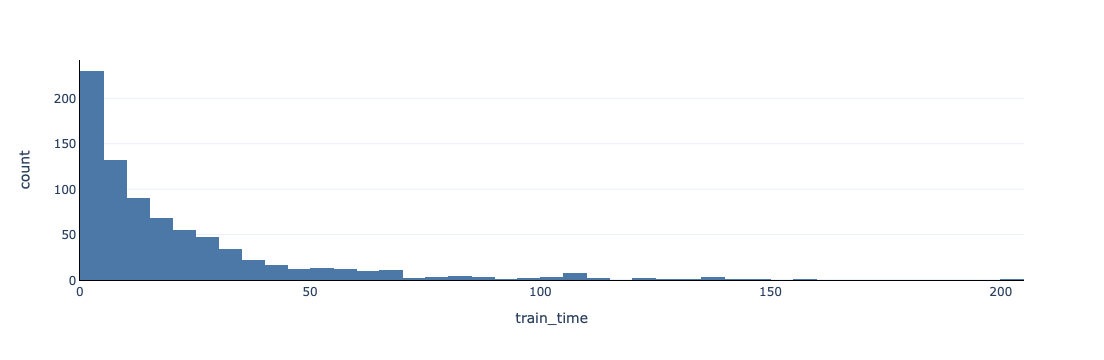

In [657]:
px.histogram(df, x="train_time", nbins=2**6)

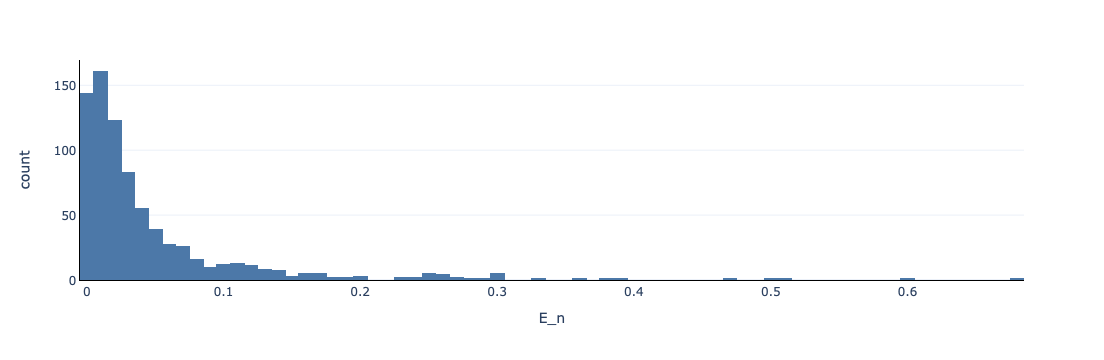

In [658]:
px.histogram(df, x="E_n", nbins=2**7)

In [659]:
resource_column = "E_n"
resource_df = pd.DataFrame(df)
# ressource_column = "energy"
resource_per_epoch = (resource_df[resource_column].values / 10).reshape(-1, 1)
epoch_time = resource_per_epoch * (1+np.arange(10)).reshape(1, -1)
np.max(epoch_time)

0.6816026890459752

In [660]:
resource_df["epoch_resources"] = epoch_time.tolist()

In [661]:
sample_times = np.linspace(0, np.max(epoch_time), 2**10)
peak_profile_time = np.zeros((peak_profile.shape[0], sample_times.shape[0]))
for i in range(0, peak_profile.shape[0]):
    peak_profile_time[i] = np.interp(sample_times, epoch_time[i], peak_profile[i])
peak_profile_time

array([[0.62953629, 0.62953629, 0.66046936, ..., 0.78427419, 0.78427419,
        0.78427419],
       [0.60904255, 0.60904255, 0.60904255, ..., 0.64893617, 0.64893617,
        0.64893617],
       [0.62599734, 0.62599734, 0.62599734, ..., 0.67952128, 0.67952128,
        0.67952128],
       ...,
       [0.62664474, 0.62664474, 0.69849433, ..., 0.89802632, 0.89802632,
        0.89802632],
       [0.62664474, 0.77467105, 0.78868587, ..., 0.83059211, 0.83059211,
        0.83059211],
       [0.8125    , 0.8125    , 0.84446103, ..., 0.88980263, 0.88980263,
        0.88980263]])

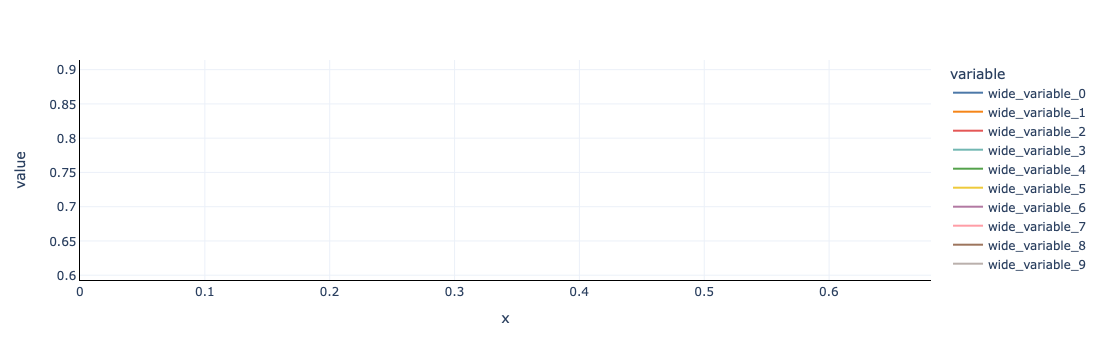

In [662]:
px.line(x=sample_times, y=peak_profile_time[:5].tolist() + peak_profile_time[-5:].tolist())

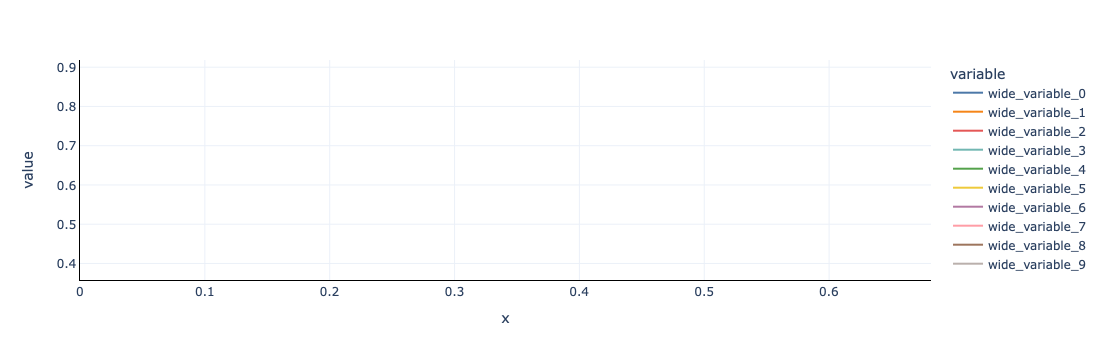

In [663]:
sample_timestep = sample_times[1] - sample_times[0]
normalized_sample_times = (sample_times - sample_timestep) / (np.max(epoch_time) + sample_timestep)
# pepr = peak_profile_time / (1+normalized_sample_times)
pepr = peak_profile_time / (1+sample_times)
px.line(x=sample_times, y=pepr[:5].tolist() + pepr[-5:].tolist())

In [692]:
# idx = dataset_df["model"] == "ghostnet_100"
idx = dataset_df["model"] == "ese_vovnet19b_dw"
curve_df = dataset_df[idx]
curve = next(curve_df.itertuples())
curve

Pandas(Index=15, model='ese_vovnet19b_dw', num_param=6543080, memT=25.435111424, memR=3.839885312, memA=0.133867008, memM=3.329199616, energy=0.020419759188, co2=1.153716394135, train_time=12.8917181491852, infer_time=0, test_00=0.836189516129032, inf_time=0.967909288406372, tr_acc=0.986301369863014, test_01=0.845262096774193, test_02=0.818548387096774, test_03=0.830645161290323, test_04=0.846270161290323, test_05=0.870967741935484, test_06=0.852318548387097, test_07=0.86491935483871, test_08=0.859879032258064, test_09=0.863407258064516, pretrain=1, type='CNN', efficient=1, dataset='derma_pt', pen=0.7991938361634837, conv_idx=6, best_test=0.870967741935484, energy_conv=3.403293198, time_conv=2.148619691530867, co2_conv=0.1922860656891666, E_n=0.0126456367533666, pepr_e=0.8600913392841796, C_n=0.0078642668653758, pepr_c=0.8641716653417403, T_n=0.0128282172368519, pepr_t=0.8580148181805696, pepr_m=0.7870181099920762, cnn=True, _41=0.8599362923671453, label='ese_vovnet19b_dw derma_pt', te

In [748]:
test_lim = [0.83, 0.88]
resource_lim = [0, 0.015]

test_range = np.linspace(test_lim[0], test_lim[1], 2**8)
resource_range = np.linspace(resource_lim[0], resource_lim[1], 2**8)

test_grid, resource_grid = np.meshgrid(test_range, resource_range)
def pepr(x, y):
    return y/(1+x)
pepr_values = pepr(resource_grid, test_grid)

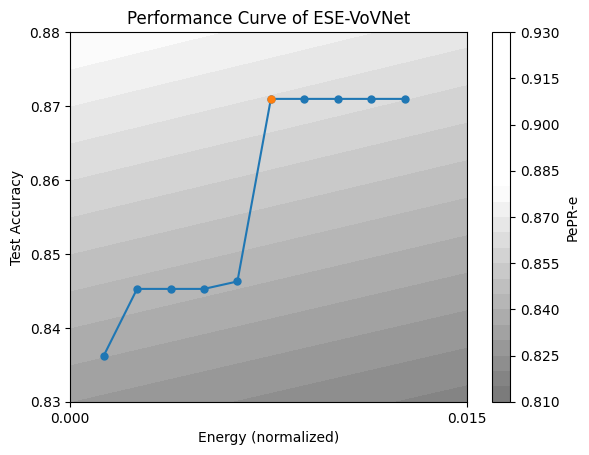

In [750]:
contour_levels = np.arange(test_lim[0] - 0.02, test_lim[1] + 0.05, 0.005)

pepr_profile = pepr(np.array(curve.epoch_resources), curve.peak_profile)
r_star = np.argmax(pepr_profile)

contour = plt.contourf(resource_range, test_range, pepr_values.T, antialiased=False, levels=contour_levels, cmap="gray", vmin=0.75, vmax=test_lim[1])
plt.plot(curve.epoch_resources, curve.peak_profile, marker="o", markersize=5)
plt.plot(curve.epoch_resources[r_star], curve.peak_profile[r_star], marker="o", markersize=5)
# plt.scatter(pareto_df[resource_column], pareto_df["test"], s=5)
plt.xlabel("Energy (normalized)")
plt.ylabel("Test Accuracy")
plt.xlim(resource_lim)
plt.ylim(test_lim)
plt.xticks([resource_lim[0], resource_lim[1]])
plt.title("Performance Curve of ESE-VoVNet")
colorbar = plt.colorbar(contour)
colorbar.set_label("PePR-e")
plt.savefig("performance-curve-vovnet.pdf", dpi=300)



In [705]:
# idx = np.argmax(pepr, axis=-1)
# r_star = sample_times[idx]
# pepr_star = np.array([pepr[i, k] for i, k in enumerate(idx)])
# labels = [f"{x.model} {x.dataset}" for x in df.itertuples()]
# resource_df["pepr_star"] = pepr_star
# px.bar(y=pepr_star, hover_name=labels)
# r_star, pepr_star

In [709]:
# dataset_dfs = {k: v for k, v in resource_df.groupby("dataset")}
# dataset_df = dataset_dfs["derma_pt"]
dataset_df = resource_df[(resource_df["dataset"] == "derma_pt") | (resource_df["dataset"] == "derma_small")]
rows = []
for x in dataset_df.itertuples():
    for epoch, (resource, test) in enumerate(zip(x.epoch_resources, x.peak_profile)):
        peak_epoch = np.argmax(x.peak_profile)
        if epoch > peak_epoch:
            continue
        rows.append({
            "model": x.model, 
            "dataset": x.dataset, 
            "label": f"{x.label} ({epoch})",
            "epoch": epoch+1,
            resource_column: resource, 
            "test": test,
            "pepr_e": x.pepr_e
        })
epoch_df = pd.DataFrame(rows)
epoch_df

model      dataset                  label  epoch       E_n      test  \
0     dla46x_c     derma_pt  dla46x_c derma_pt (0)      1  0.000733  0.629536   
1     dla46x_c     derma_pt  dla46x_c derma_pt (1)      2  0.001466  0.667339   
2     dla46x_c     derma_pt  dla46x_c derma_pt (2)      3  0.002199  0.688508   
3     dla46x_c     derma_pt  dla46x_c derma_pt (3)      4  0.002931  0.688508   
4     dla46x_c     derma_pt  dla46x_c derma_pt (4)      5  0.003664  0.777722   
...        ...          ...                    ...    ...       ...       ...   
1919     vgg13  derma_small  vgg13 derma_small (2)      3  0.001495  0.634577   
1920     vgg13  derma_small  vgg13 derma_small (3)      4  0.001994  0.634577   
1921     vgg13  derma_small  vgg13 derma_small (4)      5  0.002492  0.634577   
1922     vgg13  derma_small  vgg13 derma_small (5)      6  0.002991  0.634577   
1923     vgg13  derma_small  vgg13 derma_small (6)      7  0.003489  0.669355   

        pepr_e  
0     0.778568  
1     0.778568  
2     0.778568  
3     0.778568  
4     0.778568  
...        ...  
1919  0.666035  
1920  0.666035  
1921  0.666035  
1922  0.666035  
1923  0.666035  

[1924 rows x 7 columns]

/Users/bob/venv/python3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



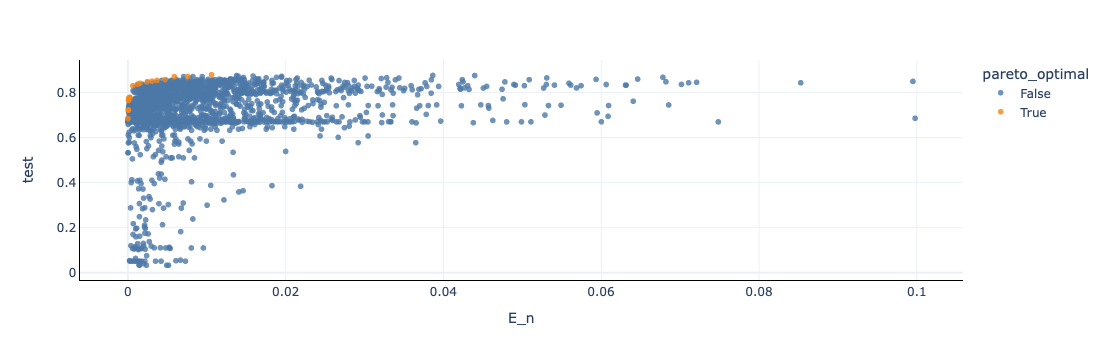

In [711]:
pareto_mask = paretoset.paretoset(epoch_df[["test", resource_column]], sense=["max", "min"])
epoch_df["pareto_optimal"] = pareto_mask
px.scatter(epoch_df, x=resource_column, y="test", color="pareto_optimal", hover_name="label", opacity=0.8)

In [712]:
pareto_df = epoch_df[epoch_df["pareto_optimal"]].sort_values("test", ascending=False).reset_index()
pareto_df = pd.merge(pareto_df, model_df, on="model")
pareto_df = pd.merge(pareto_df, dataset_info_df, on="dataset")

In [756]:
# test_range = np.linspace(epoch_df["test"].min(), epoch_df["test"].max(), 2**8)
# resource_range = np.linspace(epoch_df[resource_column].min(), epoch_df[resource_column].max(), 2**8)
# test_range = np.linspace(0.5, 1.0, 2**8)
# resource_range = np.linspace(0, 0.1, 2**8)

test_lim = [0.7, 0.9]
resource_lim = [0, 0.03]

test_range = np.linspace(test_lim[0], test_lim[1], 2**8)
resource_range = np.linspace(resource_lim[0], resource_lim[1], 2**8)

test_grid, resource_grid = np.meshgrid(test_range, resource_range)
def pepr(x, y):
    return y/(1+x)
pepr_values = pepr(resource_grid, test_grid)

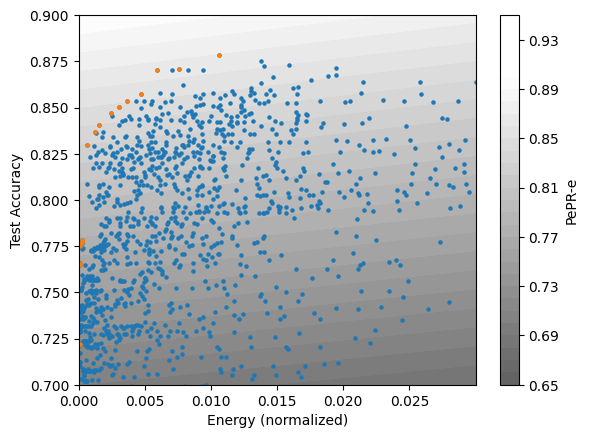

In [760]:
import matplotlib.pyplot as plt

contour_levels = np.arange(test_lim[0] - 0.05, test_lim[1]+0.05, 0.01)

contour = plt.contourf(resource_range, test_range, pepr_values.T, levels=contour_levels, cmap="gray", vmin=0.5, vmax=test_lim[1])
plt.scatter(epoch_df[resource_column], epoch_df["test"], s=5)
plt.scatter(pareto_df[resource_column], pareto_df["test"], s=5)
plt.xlabel("Energy (normalized)")
plt.ylabel("Test Accuracy")
plt.xlim(resource_lim)
plt.ylim(test_lim)
plt.xticks(np.arange(resource_lim[0], resource_lim[1], 0.005))
colorbar = plt.colorbar(contour)
colorbar.set_label("PePR-e")
plt.savefig("pepr-pareto-derma.pdf", dpi=300)

In [761]:
import os
os.getcwd()

'/Users/bob/Library/CloudStorage/OneDrive-UniversityofCopenhagen/MIA-Energy/Bob'

/Users/bob/venv/python3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



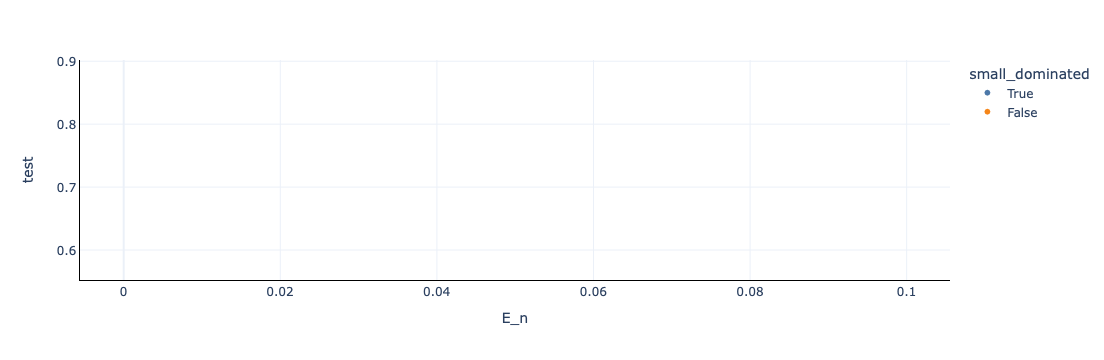

In [762]:
pareto_small = pareto_df[pareto_df["pareto_optimal"] & (pareto_df["small"])]
pareto_small_resource = pareto_small[resource_column].min()
pareto_small_test = pareto_small["test"].max()
dominated_df = pd.merge(epoch_df, dataset_info_df, on="dataset", how="left")
dominated_df = pd.merge(dominated_df, model_df, on="model", how="left")
dominated_df["small_dominated"] = (dominated_df["test"] < pareto_small_test) & (dominated_df[resource_column] > pareto_small_resource)
px.scatter(dominated_df[dominated_df["small"] == False], x=resource_column, y="test", color="small_dominated")
# pareto_small_dominated = epoch_df[(epoch_df["test"] < pareto_small_test) & (epoch_df[resource_column] > pareto_small_resource)]
# pareto_small_dominated = pd.merge(pareto_small_dominated, dataset_info_df, on="dataset", how="left")
# pareto_small_dominated = pd.merge(pareto_small_dominated, model_df, on="model", how="left")
# px.scatter(pareto_small_dominated, x=resource_column, y="test", color="small")
# px.histogram(pareto_small_dominated, x="epoch", color="small")
# pareto_small_dominated[pareto_small_dominated["small"] == False]["model"].unique()

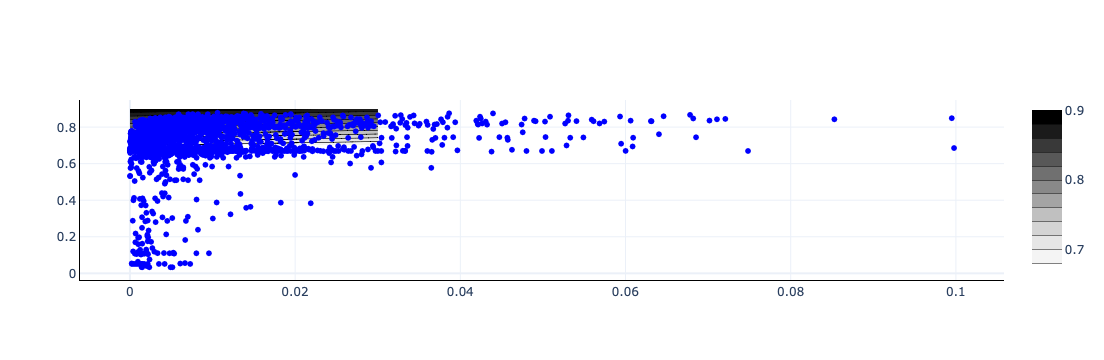

In [763]:
pepr_trace = {"x": resource_range, "y": test_range, "z": pepr_values.T, "type": "contour", "colorscale": "greys"}
epoch_trace = {"x": epoch_df[resource_column], "y": epoch_df["test"], "mode": "markers", "marker": {"color": "blue"}}
go.Figure(data=[pepr_trace, epoch_trace])

In [764]:

pareto_df["efficient_label"] = ["Yes" if x else "No" for x in pareto_df["efficient"].values]
pareto_df["small_label"] = ["10%" if x else "Full" for x in pareto_df["small"].values]
# pareto_df["energy_label"] = pareto_df["energy"] * 1000
pareto_df["energy_label"] = [f"{x*1000:.2f}" for x in pareto_df[resource_column]]
pareto_df["num_param_label"] = [f"{(int(x)/1e6):.1f} M" for x in pareto_df["num_param"]]
pareto_df["test_label"] = [f"{x:.3f}" for x in pareto_df["test"]]
pareto_df["epoch_label"] = [f"{x:d}" for x in pareto_df["epoch"]]

table_columns = {
    "model": "Model", 
    "small_label": "Dataset",
    "epoch_label": "Epoch", 
    "num_param_label": "Parameters", 
    "type": "Type",
    "efficient_label": "Efficient",
    "energy_label": "Energy [Wh]", 
    "test_label": "Test Accuracy", 
}
table_df = pareto_df[list(table_columns)].rename(columns=table_columns)
table_df

Model Dataset Epoch Parameters   Type Efficient  \
0             ecaresnet26t    Full     9     16.0 M  Other       Yes   
1         ese_vovnet19b_dw    Full     6      6.5 M    CNN       Yes   
2             ecaresnet26t    Full     5     16.0 M  Other       Yes   
3                resnet51q    Full     2     35.7 M    CNN        No   
4             ghostnet_100    Full     6      5.2 M    CNN       Yes   
5             ghostnet_100    Full     5      5.2 M    CNN       Yes   
6             ghostnet_100    Full     4      5.2 M    CNN       Yes   
7   gc_efficientnetv2_rw_t    Full     1     13.7 M  Other       Yes   
8             ghostnet_100    Full     2      5.2 M    CNN       Yes   
9             ghostnet_100    Full     1      5.2 M    CNN       Yes   
10        ese_vovnet19b_dw     10%    10      6.5 M    CNN       Yes   
11        ese_vovnet19b_dw     10%     9      6.5 M    CNN       Yes   
12        ese_vovnet19b_dw     10%     6      6.5 M    CNN       Yes   
13        ese_vovnet19b_dw     10%     5      6.5 M    CNN       Yes   
14        ese_vovnet19b_dw     10%     4      6.5 M    CNN       Yes   
15        ese_vovnet19b_dw     10%     3      6.5 M    CNN       Yes   
16                dla46x_c     10%     6      1.1 M    CNN        No   
17        ese_vovnet19b_dw     10%     2      6.5 M    CNN       Yes   
18                dla46x_c     10%     4      1.1 M    CNN        No   
19           convnext_atto     10%    10      3.7 M    CNN        No   

   Energy [Wh] Test Accuracy  
0        10.60         0.879  
1         7.59         0.871  
2         5.89         0.870  
3         4.71         0.857  
4         3.68         0.853  
5         3.06         0.850  
6         2.45         0.847  
7         1.53         0.841  
8         1.23         0.837  
9         0.61         0.830  
10        0.26         0.778  
11        0.23         0.777  
12        0.16         0.777  
13        0.13         0.775  
14        0.10         0.766  
15        0.08         0.765  
16        0.07         0.722  
17        0.05         0.722  
18        0.05         0.721  
19        0.00         0.684

In [765]:
print(table_df.to_latex(escape=True, index_names=False))

\begin{tabular}{lllllllll}
\toprule
 & Model & Dataset & Epoch & Parameters & Type & Efficient & Energy [Wh] & Test Accuracy \\
\midrule
0 & ecaresnet26t & Full & 9 & 16.0 M & Other & Yes & 10.60 & 0.879 \\
1 & ese\_vovnet19b\_dw & Full & 6 & 6.5 M & CNN & Yes & 7.59 & 0.871 \\
2 & ecaresnet26t & Full & 5 & 16.0 M & Other & Yes & 5.89 & 0.870 \\
3 & resnet51q & Full & 2 & 35.7 M & CNN & No & 4.71 & 0.857 \\
4 & ghostnet\_100 & Full & 6 & 5.2 M & CNN & Yes & 3.68 & 0.853 \\
5 & ghostnet\_100 & Full & 5 & 5.2 M & CNN & Yes & 3.06 & 0.850 \\
6 & ghostnet\_100 & Full & 4 & 5.2 M & CNN & Yes & 2.45 & 0.847 \\
7 & gc\_efficientnetv2\_rw\_t & Full & 1 & 13.7 M & Other & Yes & 1.53 & 0.841 \\
8 & ghostnet\_100 & Full & 2 & 5.2 M & CNN & Yes & 1.23 & 0.837 \\
9 & ghostnet\_100 & Full & 1 & 5.2 M & CNN & Yes & 0.61 & 0.830 \\
10 & ese\_vovnet19b\_dw & 10\% & 10 & 6.5 M & CNN & Yes & 0.26 & 0.778 \\
11 & ese\_vovnet19b\_dw & 10\% & 9 & 6.5 M & CNN & Yes & 0.23 & 0.777 \\
12 & ese\_vovnet19b\_dw &

In [766]:
frontier_models = pd.DataFrame()
frontier_models["model"] = pareto_df["model"].unique()
frontier_models["pareto_frontier"] = True
frontier_models

model  pareto_frontier
0            ecaresnet26t             True
1        ese_vovnet19b_dw             True
2               resnet51q             True
3            ghostnet_100             True
4  gc_efficientnetv2_rw_t             True
5                dla46x_c             True
6           convnext_atto             True

/Users/bob/venv/python3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



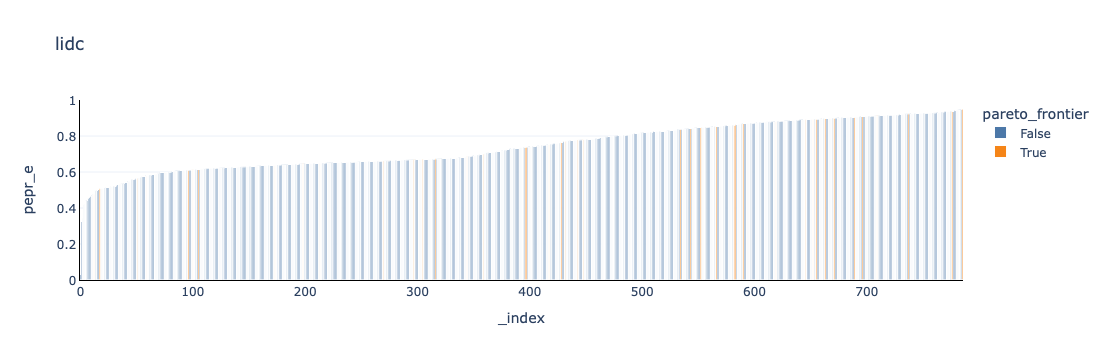

In [768]:
frontier_pepr_df = pd.merge(resource_df, frontier_models, on="model", how="left")
idx = frontier_pepr_df["pareto_frontier"] != True
frontier_pepr_df.loc[idx, "pareto_frontier"] = False
bar_column = "pepr_e"
frontier_pepr_df = frontier_pepr_df.sort_values(bar_column).reset_index()
px.bar(frontier_pepr_df, y=bar_column, color="pareto_frontier", hover_name="label", title=dataset_prefix, category_orders={"pareto_frontier": [False, True]})

/Users/bob/venv/python3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



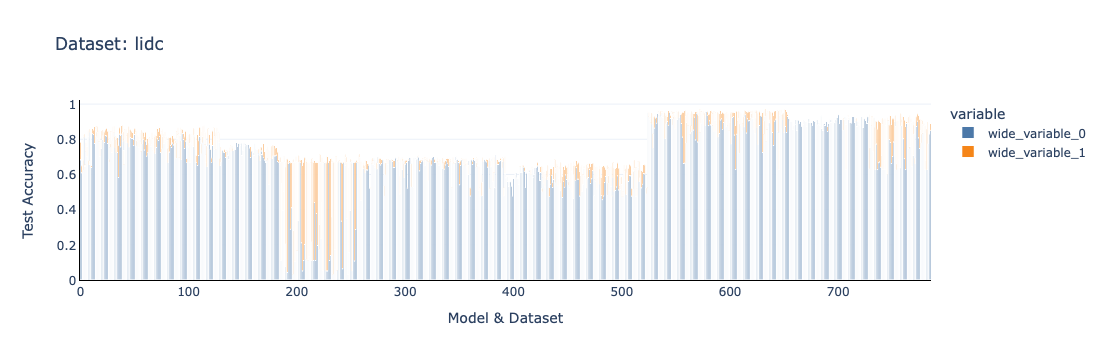

In [769]:
base_idx = 3
labels = [f"{x.model} {x.dataset}" for x in df.itertuples()]
px.bar(y=[peak_profile_time[:, base_idx], peak_profile_time[:, -1]-peak_profile_time[:, base_idx]], 
       hover_name=labels, labels={"index": "Model & Dataset", "value": "Test Accuracy"}, title=f"Dataset: {dataset_prefix}")

In [770]:
stratify_column = "num_param"
quantile_p = np.linspace(0, 1, 6)
quantiles = np.quantile(df[stratify_column].values, quantile_p)
quantiles[-1] += 1e-6
quantile_p, quantiles

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 array([1.06844000e+06, 1.17087440e+07, 2.11102480e+07, 2.76421840e+07,
        5.07215840e+07, 1.33047848e+08]))

In [771]:
# resource_df["model_size"] = ["small" if x.num_param < 30e6 else "large" for x in resource_df.itertuples()]
resource_df["model_size"] = ["small" if x.num_param < 25e6 else "large" for x in resource_df.itertuples()]

In [772]:
def compute_strat_stats(dataset_df, strat_column, value_column):
    strat_dfs = list(dataset_df.groupby(strat_column))
    column_result = {}
    groups = [df[value_column]for _, df in strat_dfs]
    column_result["kruskal_p"] = scipy.stats.kruskal(*groups).pvalue
    column_result["f_oneway_p"] = scipy.stats.f_oneway(*groups).pvalue
    column_result["normality_p"] = {k: scipy.stats.normaltest(df[value_column]).pvalue for k, df in strat_dfs}
    column_result["means"] = {k: df[value_column].mean() for k, df in strat_dfs}
    column_result["medians"] = {k: df[value_column].median() for k, df in strat_dfs}
    column_result["stds"] = {k: df[value_column].std() for k, df in strat_dfs}
    p_values_median = {}
    p_values_mean = {}
    for i, (k_i, df_i) in enumerate(strat_dfs):
        for k_j, df_j in strat_dfs[(i+1):]:
            stat_median = scipy.stats.kruskal(df_i[value_column], df_j[value_column])
            stat_mean = scipy.stats.ttest_ind(df_i[value_column], df_j[value_column], equal_var=False)
            p_values_median[(k_i, k_j)] = stat_median.pvalue
            p_values_mean[(k_i, k_j)] = stat_mean.pvalue
    column_result["mean_p"] = p_values_mean
    column_result["median_p"] = p_values_median
    return column_result

In [773]:
stratification_columns = ["model_size", "type", "efficient"]
value_columns = ["best_test", "pepr_e"]
result = {}
for dataset, dataset_df in resource_df.groupby("dataset"):
    for strat_column in stratification_columns:
        for value_column in value_columns:
            result[(dataset, strat_column, value_column)] = compute_strat_stats(dataset_df, strat_column, value_column)
result

{('derma_pt', 'model_size', 'best_test'): {'kruskal_p': 0.5681073513692994,
  'f_oneway_p': 0.9731377737158473,
  'normality_p': {'large': 0.000503202867869485,
   'small': 3.0951114571528634e-06},
  'means': {'large': 0.8151752481389579, 'small': 0.8148680741873089},
  'medians': {'large': 0.827620967741935, 'small': 0.837953629032258},
  'stds': {'large': 0.04647673183026001, 'small': 0.057101042081345615},
  'mean_p': {('large', 'small'): 0.9730976492479115},
  'median_p': {('large', 'small'): 0.5681073513692994}},
 ('derma_pt', 'model_size', 'pepr_e'): {'kruskal_p': 0.017533069643045684,
  'f_oneway_p': 0.07049628042546834,
  'normality_p': {'large': 3.4471099229213005e-08,
   'small': 0.00010806289023075281},
  'means': {'large': 0.7803785432759889, 'small': 0.7986349461217309},
  'medians': {'large': 0.7964079529875125, 'small': 0.8193189160853294},
  'stds': {'large': 0.057168928447167436, 'small': 0.05739614964165059},
  'mean_p': {('large', 'small'): 0.07048811207747023},
  'm

/Users/bob/venv/python3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



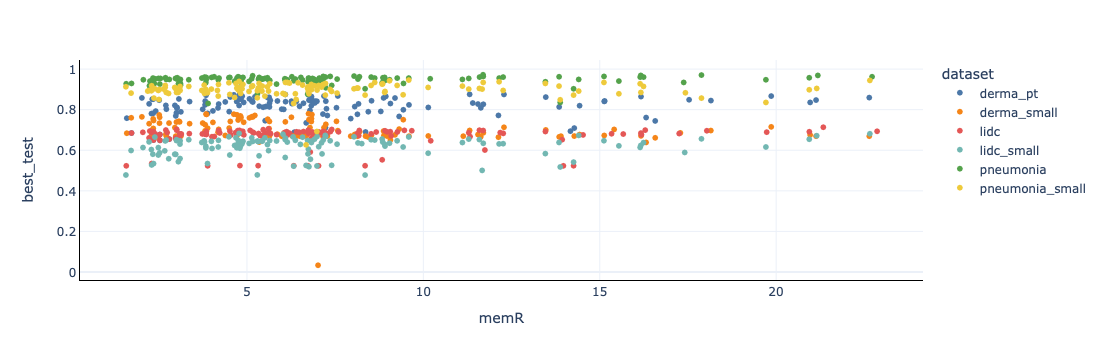

In [774]:
px.scatter(df, x="memR", y="best_test", color=df["dataset"])

In [775]:
dataset_dfs = {k: v for k, v in resource_df.groupby("dataset")}

/Users/bob/venv/python3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



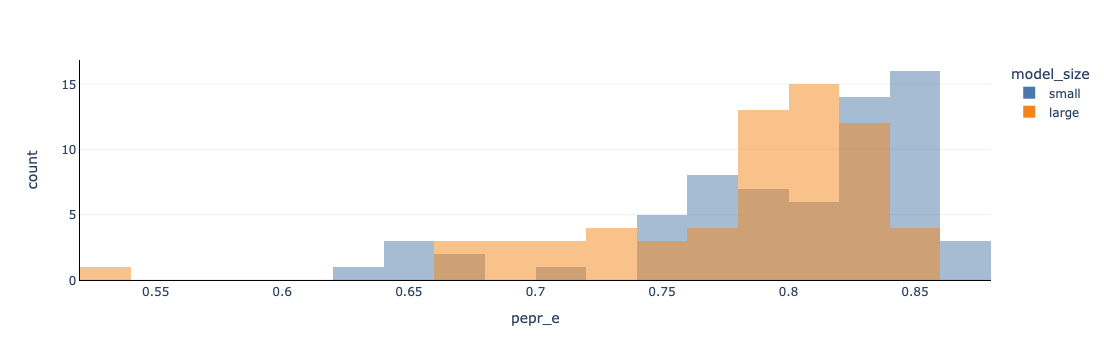

In [776]:
px.histogram(dataset_dfs["derma_pt"], x="pepr_e", color="model_size", barmode="overlay")

In [777]:
significant_results = {k: v for k, v in result.items() if v["kruskal_p"] < 0.05}
significant_results

{('derma_pt', 'model_size', 'pepr_e'): {'kruskal_p': 0.017533069643045684,
  'f_oneway_p': 0.07049628042546834,
  'normality_p': {'large': 3.4471099229213005e-08,
   'small': 0.00010806289023075281},
  'means': {'large': 0.7803785432759889, 'small': 0.7986349461217309},
  'medians': {'large': 0.7964079529875125, 'small': 0.8193189160853294},
  'stds': {'large': 0.057168928447167436, 'small': 0.05739614964165059},
  'mean_p': {('large', 'small'): 0.07048811207747023},
  'median_p': {('large', 'small'): 0.017533069643045684}},
 ('derma_pt', 'efficient', 'pepr_e'): {'kruskal_p': 0.011798439681382097,
  'f_oneway_p': 0.1298969701726684,
  'normality_p': {0: 1.40675054255581e-09, 1: 0.001192856137482684},
  'means': {0: 0.7853127901073529, 1: 0.8033300885883301},
  'medians': {0: 0.7958630837553696, 1: 0.8248859766891439},
  'stds': {0: 0.05527460209314832, 1: 0.06430681987175595},
  'mean_p': {(0, 1): 0.16632126040807158},
  'median_p': {(0, 1): 0.011798439681382097}},
 ('derma_small',
  '

In [779]:
rows = []
for (dataset, strat_col, val_col), r in significant_results.items():
    if val_col != "pepr_e" or strat_col != "model_size":
        continue
    rows.append({
        "dataset": dataset,
        "median_small": r["medians"]["small"],
        "median_large": r["medians"]["large"],
        "kruskal_p": r["kruskal_p"],
    })
formatters = {
    "median_small": lambda x: f"{x:.3f}",
    "median_large": lambda x: f"{x:.3f}",
    "kruskal_p": lambda x: f"{x:.3e}"
}
median_df = pd.DataFrame(rows)
print(median_df.to_latex(formatters=formatters, index=False))

\begin{tabular}{lrrr}
\toprule
dataset & median_small & median_large & kruskal_p \\
\midrule
derma_pt & 0.819 & 0.796 & 1.753e-02 \\
derma_small & 0.732 & 0.659 & 1.126e-13 \\
lidc & 0.656 & 0.626 & 6.255e-04 \\
pneumonia & 0.921 & 0.887 & 7.129e-07 \\
pneumonia_small & 0.896 & 0.871 & 2.721e-06 \\
\bottomrule
\end{tabular}



In [781]:
median_df

dataset  median_small  median_large     kruskal_p
0         derma_pt      0.819319      0.796408  1.753307e-02
1      derma_small      0.731657      0.658516  1.125918e-13
2             lidc      0.656157      0.625537  6.255279e-04
3        pneumonia      0.921142      0.887187  7.128873e-07
4  pneumonia_small      0.895993      0.870734  2.721061e-06

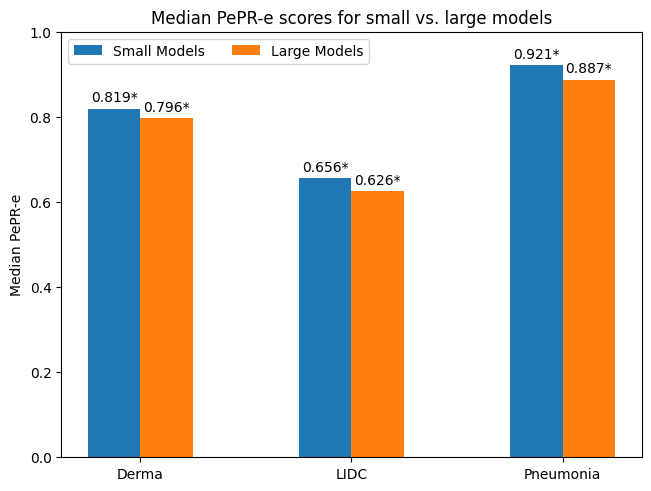

In [804]:
species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

datasets = {
    "derma_pt": "Derma",
    "lidc": "LIDC",
    "pneumonia": "Pneumonia"
}

plot_idx = (median_df["dataset"] == "derma_pt") | (median_df["dataset"] == "lidc") | (median_df["dataset"] == "pneumonia")
plot_df = median_df[plot_idx]
plot_columns = {"median_small": "Small Models", "median_large": "Large Models"}


width = 0.25  # the width of the bars
stride = len(datasets)*width + width
x = np.arange(len(datasets)) * stride

fig, ax = plt.subplots(layout='constrained')
for i, (col) in enumerate(plot_columns):
    offset = i*(width);
    # row = next(median_df[median_df["dataset"] == dataset].itertuples())
    rects = ax.bar(offset+x*stride, plot_df[col], width, label=plot_columns[col])
    ax.bar_label(rects, padding=3, fmt="{:.3f}*")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Median PePR-e')
ax.set_title('Median PePR-e scores for small vs. large models')
ax.set_xticks(x + width/2, list(datasets.values()))
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)
plt.savefig("pepr_median.pdf")
plt.show()


/Users/bob/venv/python3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



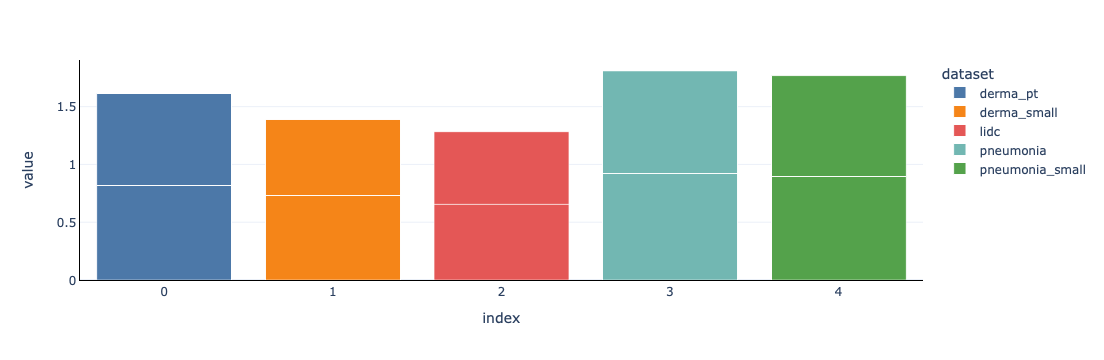

In [780]:
px.bar(median_df, y=["median_small", "median_large"], color="dataset")

In [158]:
pd.DataFrame(list(significant_results.keys()))

0           1          2
0      derma  model_size     pepr_e
1      derma        type  best_test
2      derma        type     pepr_e
3      derma   efficient  best_test
4   derma_pt  model_size     pepr_e
5   derma_pt   efficient     pepr_e
6       lidc  model_size     pepr_e
7  pneumonia  model_size     pepr_e
8  pneumonia        type  best_test
9  pneumonia   efficient  best_test

In [159]:
value_column = "pepr_star"

In [160]:
resource_df[["pepr_star", "pepr_e"]]

pepr_star    pepr_e
262   0.728459  0.728592
263   0.713910  0.711417
264   0.704378  0.698180
265   0.683111  0.683453
266   0.706318  0.706012
..         ...       ...
519   0.922149  0.899206
520   0.937315  0.825744
521   0.925796  0.882737
522   0.934346  0.917556
523   0.919408  0.821448

[524 rows x 2 columns]

/Users/bob/venv/python3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



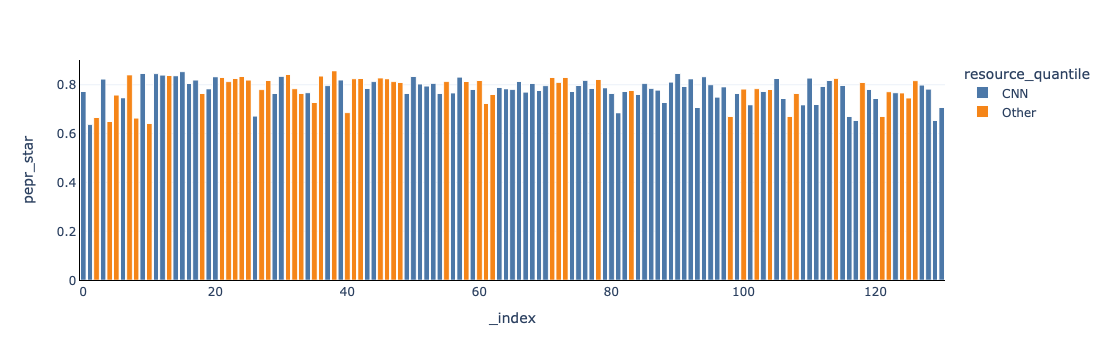

In [253]:
# resource_df["resource_quantile"] = np.searchsorted(quantiles, resource_df[stratify_column].values, side="right")
# resource_df["resource_quantile"] = resource_df["num_param"] < resource_df["num_param"].mean()
# resource_df["resource_quantile"] = resource_df["num_param"] < 30e6
resource_df["resource_quantile"] = resource_df["type"]
px.bar(resource_df.sort_values(stratify_column).reset_index(), y=value_column, color="resource_quantile")

/Users/bob/venv/python3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



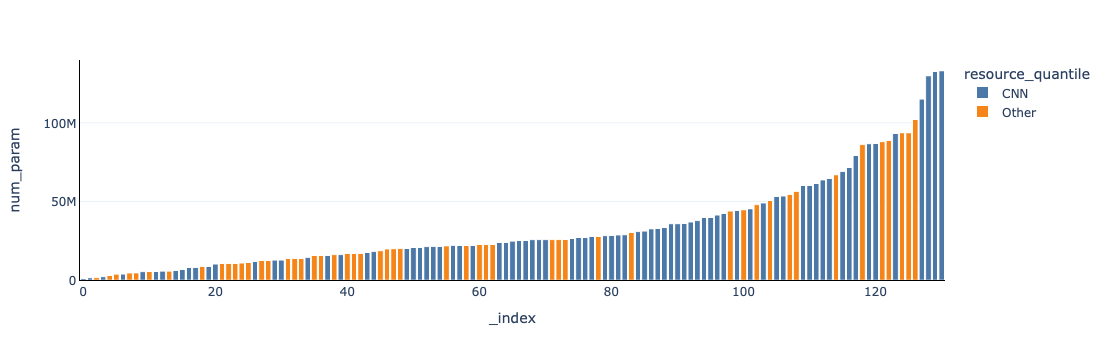

In [254]:
px.bar(resource_df.sort_values(stratify_column).reset_index(), y=stratify_column, color="resource_quantile")

In [255]:
import scipy.stats

In [256]:
scipy.stats.pearsonr(resource_df[stratify_column], resource_df[value_column]), scipy.stats.spearmanr(resource_df[stratify_column], resource_df[value_column])

(PearsonRResult(statistic=-0.23788471032525985, pvalue=0.0062188853942864815),
 SignificanceResult(statistic=-0.26040989655853686, pvalue=0.002664833742425794))

In [257]:
quantile_dfs = list(resource_df.groupby("resource_quantile"))

In [258]:
quantile_indices = [resource_df["resource_quantile"] == k for k in resource_df["resource_quantile"].unique()]
values = resource_df[value_column]
groups = [values[idx] for idx in quantile_indices]
scipy.stats.kruskal(*groups), scipy.stats.f_oneway(*groups)

(KruskalResult(statistic=0.563309656648822, pvalue=0.4529297968495908),
 F_onewayResult(statistic=0.007377251073375377, pvalue=0.9316862935348031))

In [259]:
[scipy.stats.normaltest(df[value_column]) for k, df in quantile_dfs]

[NormaltestResult(statistic=15.78550980989344, pvalue=0.0003734393666161841),
 NormaltestResult(statistic=8.750245703482848, pvalue=0.012586595862227913)]

In [263]:
means = {k: df[value_column].mean() for k, df in quantile_dfs}
medians = {k: df[value_column].median() for k, df in quantile_dfs}
stds = {k: df[value_column].std() for k, df in quantile_dfs}
p_values_median = {}
p_values_mean = {}
for i, (k_i, df_i) in enumerate(quantile_dfs):
    for k_j, df_j in quantile_dfs[(i+1):]:
        stat_median = scipy.stats.kruskal(df_i[value_column], df_j[value_column])
        stat_mean = scipy.stats.ttest_ind(df_i[value_column], df_j[value_column], equal_var=False)
        p_values_median[(k_i, k_j)] = stat_median.pvalue
        p_values_mean[(k_i, k_j)] = stat_mean.pvalue
means, medians, stds, {k: p for k, p in p_values_mean.items() if p < 0.05}, {k: p for k, p in p_values_median.items() if p < 0.05}

({'CNN': 0.7793532773529627, 'Other': 0.7801579262217949},
 {'CNN': 0.784654524125718, 'Other': 0.8092580329833192},
 {'CNN': 0.04764289860703649, 'Other': 0.05887171955114585},
 {},
 {})

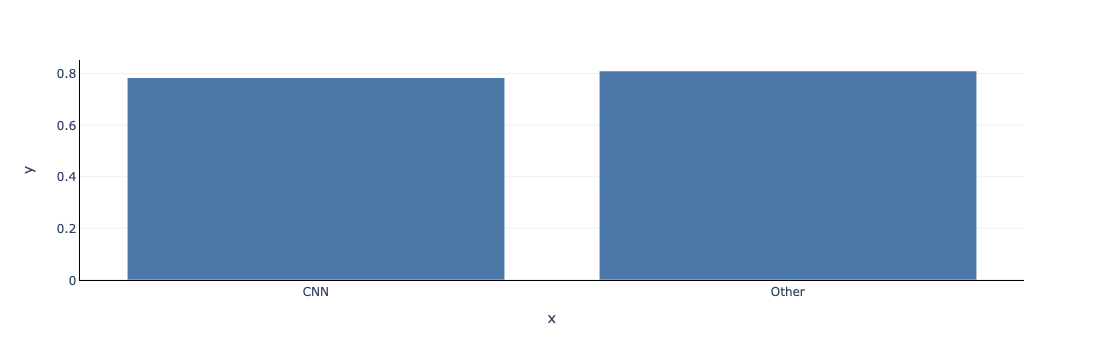

In [262]:
px.bar(x=list(medians.keys()), y=list(medians.values()))

In [ ]:
##

In [490]:
pca = sklearn.decomposition.PCA()
pca_profile = pca.fit_transform(peak_profile_time)
pca.mean_, pca.explained_variance_ratio_

(array([0.67145946, 0.67231504, 0.67317062, ..., 0.72799869, 0.72799913,
        0.72799957]),
 array([9.08545684e-01, 6.46045249e-02, 1.42737910e-02, 5.29648230e-03,
        2.85395610e-03, 1.18078263e-03, 8.60931271e-04, 5.44728941e-04,
        4.94737550e-04, 3.17956975e-04, 2.58947936e-04, 1.41061368e-04,
        1.08778631e-04, 1.03218647e-04, 8.37087362e-05, 7.35432359e-05,
        5.74536235e-05, 3.94136353e-05, 3.15300882e-05, 2.41353115e-05,
        2.02262770e-05, 1.47136864e-05, 1.12344672e-05, 9.25414525e-06,
        7.63053548e-06, 5.46507533e-06, 4.36987037e-06, 4.13554442e-06,
        3.80461346e-06, 3.13638946e-06, 2.91222564e-06, 2.79324795e-06,
        2.47823013e-06, 1.54887065e-06, 1.44187591e-06, 1.22357295e-06,
        9.60772921e-07, 9.21352317e-07, 7.02280202e-07, 6.71059138e-07,
        5.55862259e-07, 5.07468137e-07, 4.42944559e-07, 3.18232548e-07,
        2.78295864e-07, 2.35246192e-07, 2.17471152e-07, 2.01851609e-07,
        1.85627064e-07, 1.66232513e-07, 1

In [401]:
# np.corrcoef(test_profile, rowvar=False)

In [402]:
# np.std(test_profile, axis=1)

/Users/bob/venv/python3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



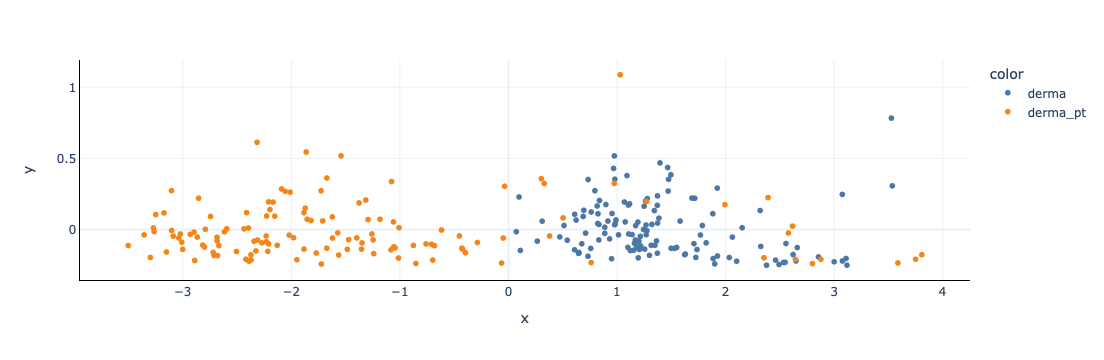

In [403]:
px.scatter(x=pca_profile[:, 0], y=pca_profile[:, 1], hover_name=df["label"], opacity=1.0, color=df["dataset"], color_continuous_scale="RdBu")

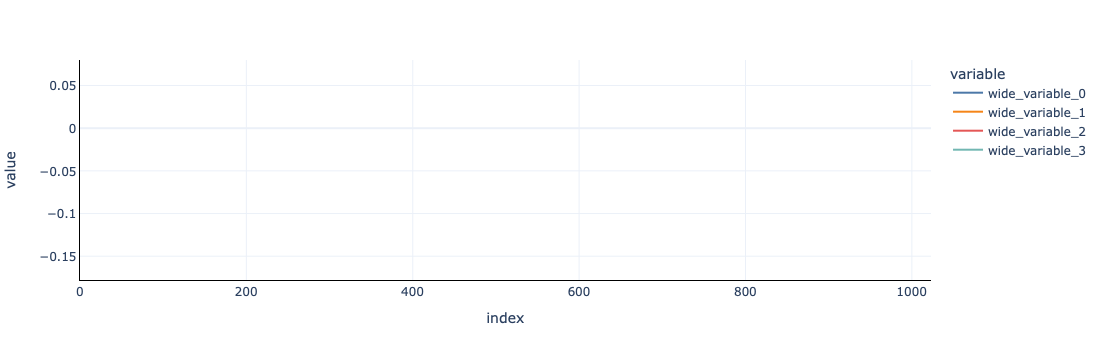

In [404]:
px.line(y=[pca.components_[i] for i in range(4)])